<a href="https://colab.research.google.com/github/akshaytripathi09/CLASSIFICATION-USING-ANN-CHURN-MODELING-/blob/main/Classification_using_ANN_(CM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSTOMER CHURN PREDICTION USING ANN


###In this tutorial you will solve classification problem where in we have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## IIMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
%matplotlib inline
from IPython.display import display
# removing warnings
import sys
import warnings
if not sys.warnoptions:
  warnings.simplefilter("ignore")


In [2]:
print(tensorflow.__version__)

2.15.0


## Importing Dataset

In [3]:
df = pd.read_csv('Churn_Modelling.csv', index_col = 'RowNumber')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Some columns are totally unproductive so let's remove them
df.drop(['CustomerId','Surname'],axis = 1, inplace = True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Some columns have text data so let's one encode them
# for more one hot encoding click this link below

df = pd.get_dummies(prefix = 'Geo',data = df,columns=['Geography'])

In [10]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [11]:
df = df.replace(to_replace={'Gender': {'Female': 1, 'Male': 0}})

In [12]:
df.shape

(10000, 13)

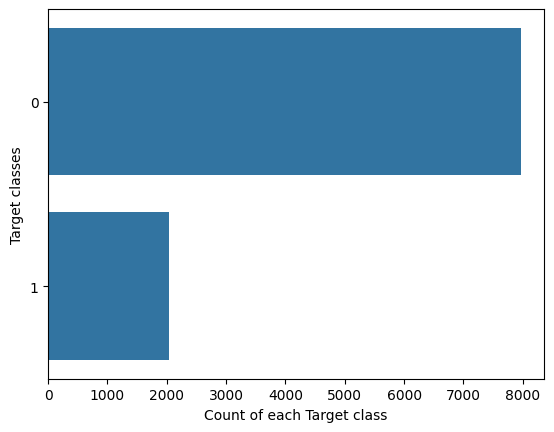

In [13]:
sns.countplot(y=df.Exited ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

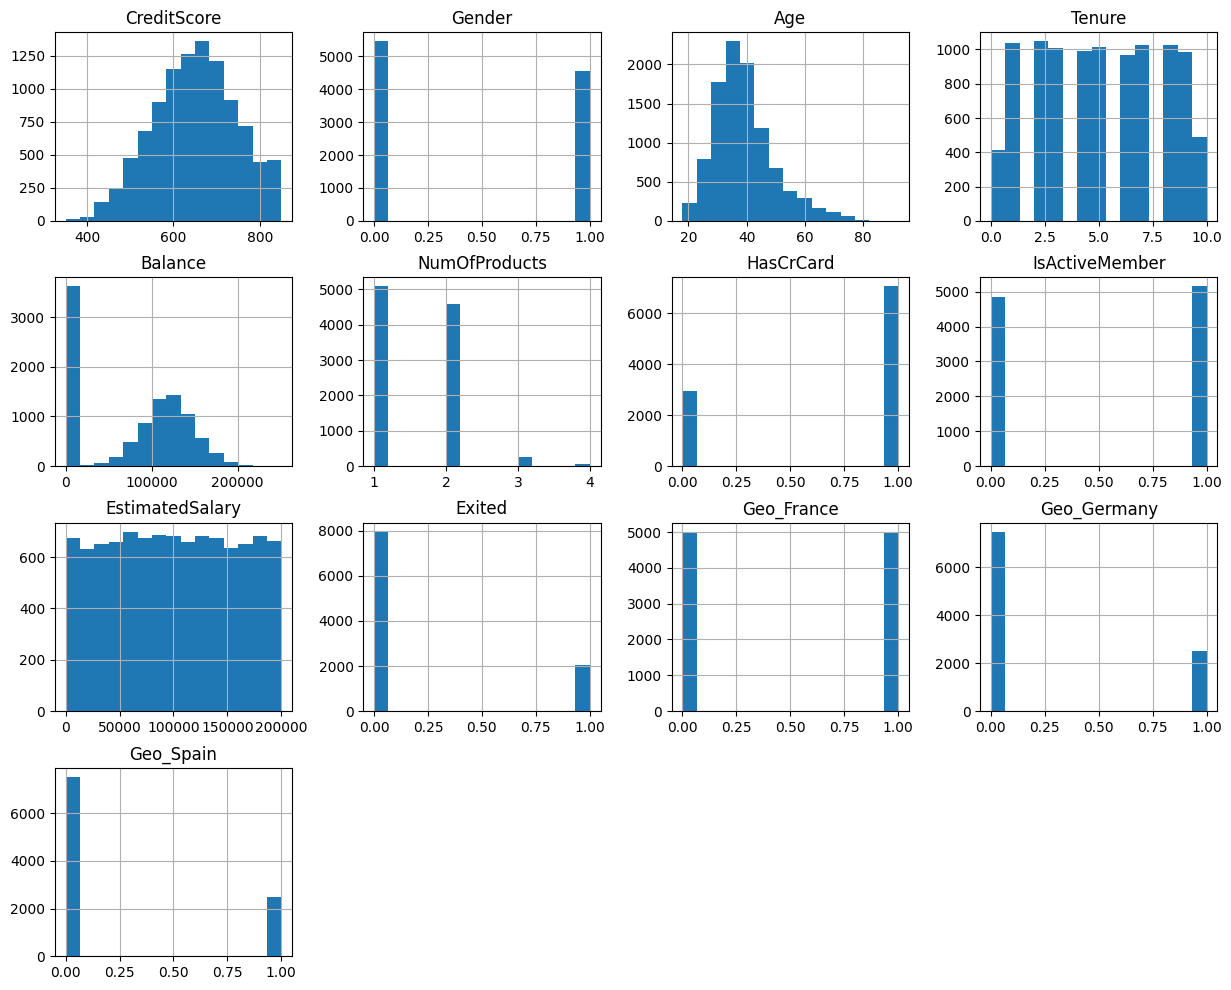

In [14]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

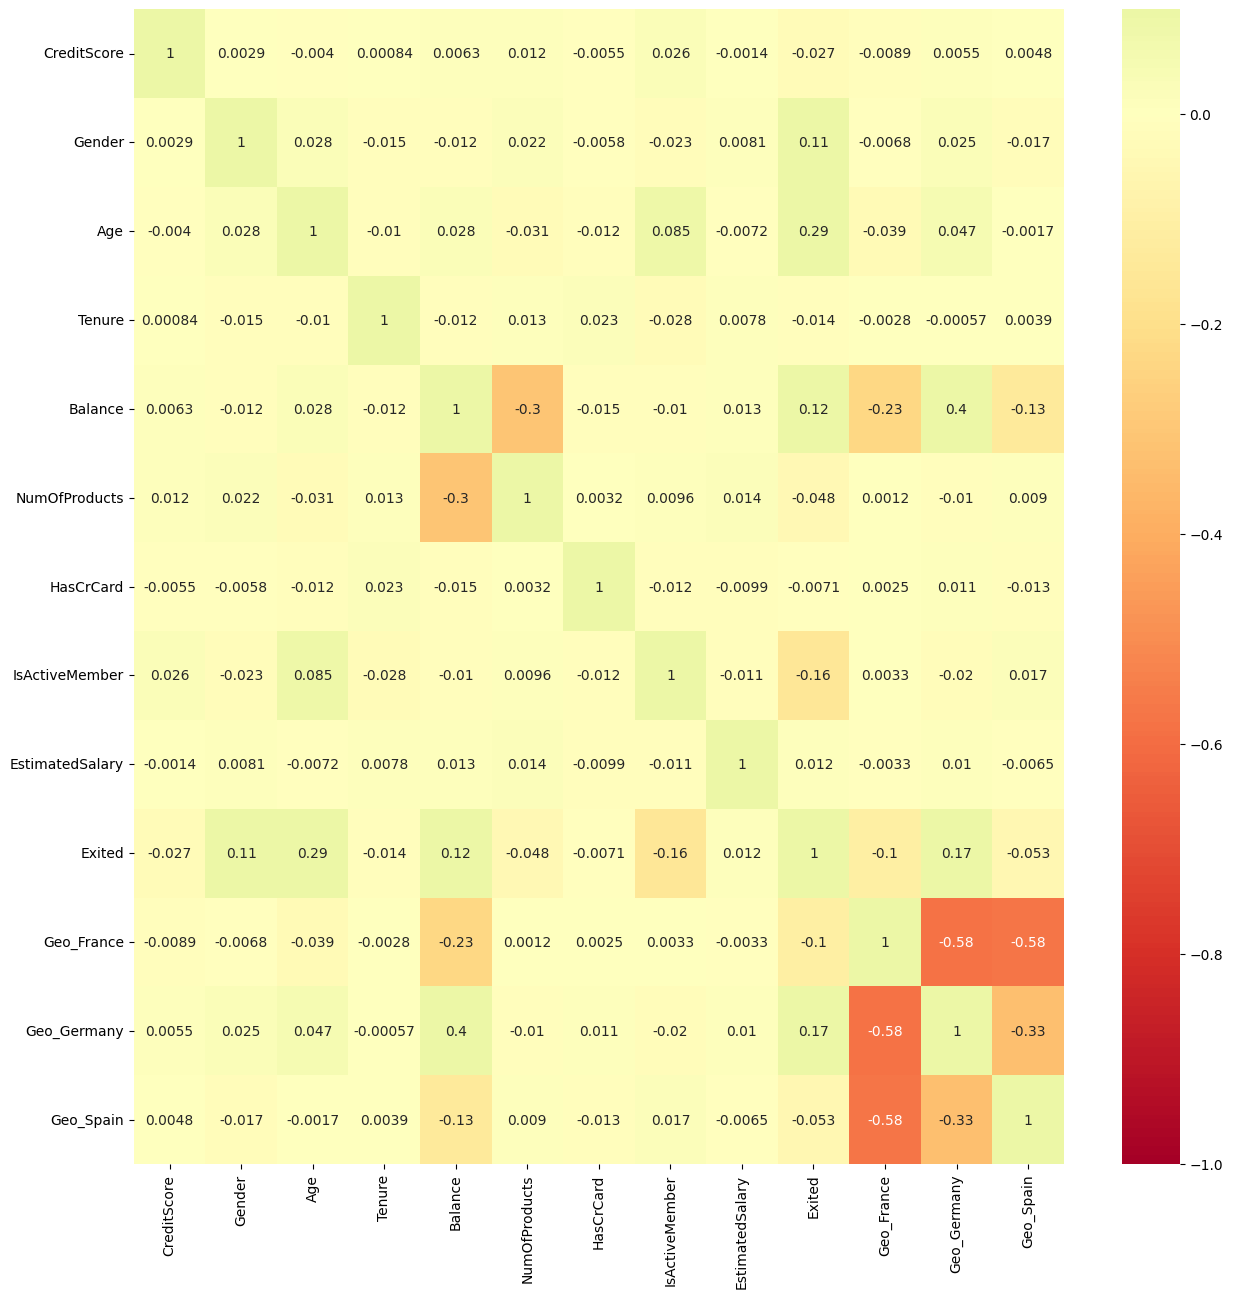

In [15]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',center=0, vmax=0.1, vmin=-1.0)

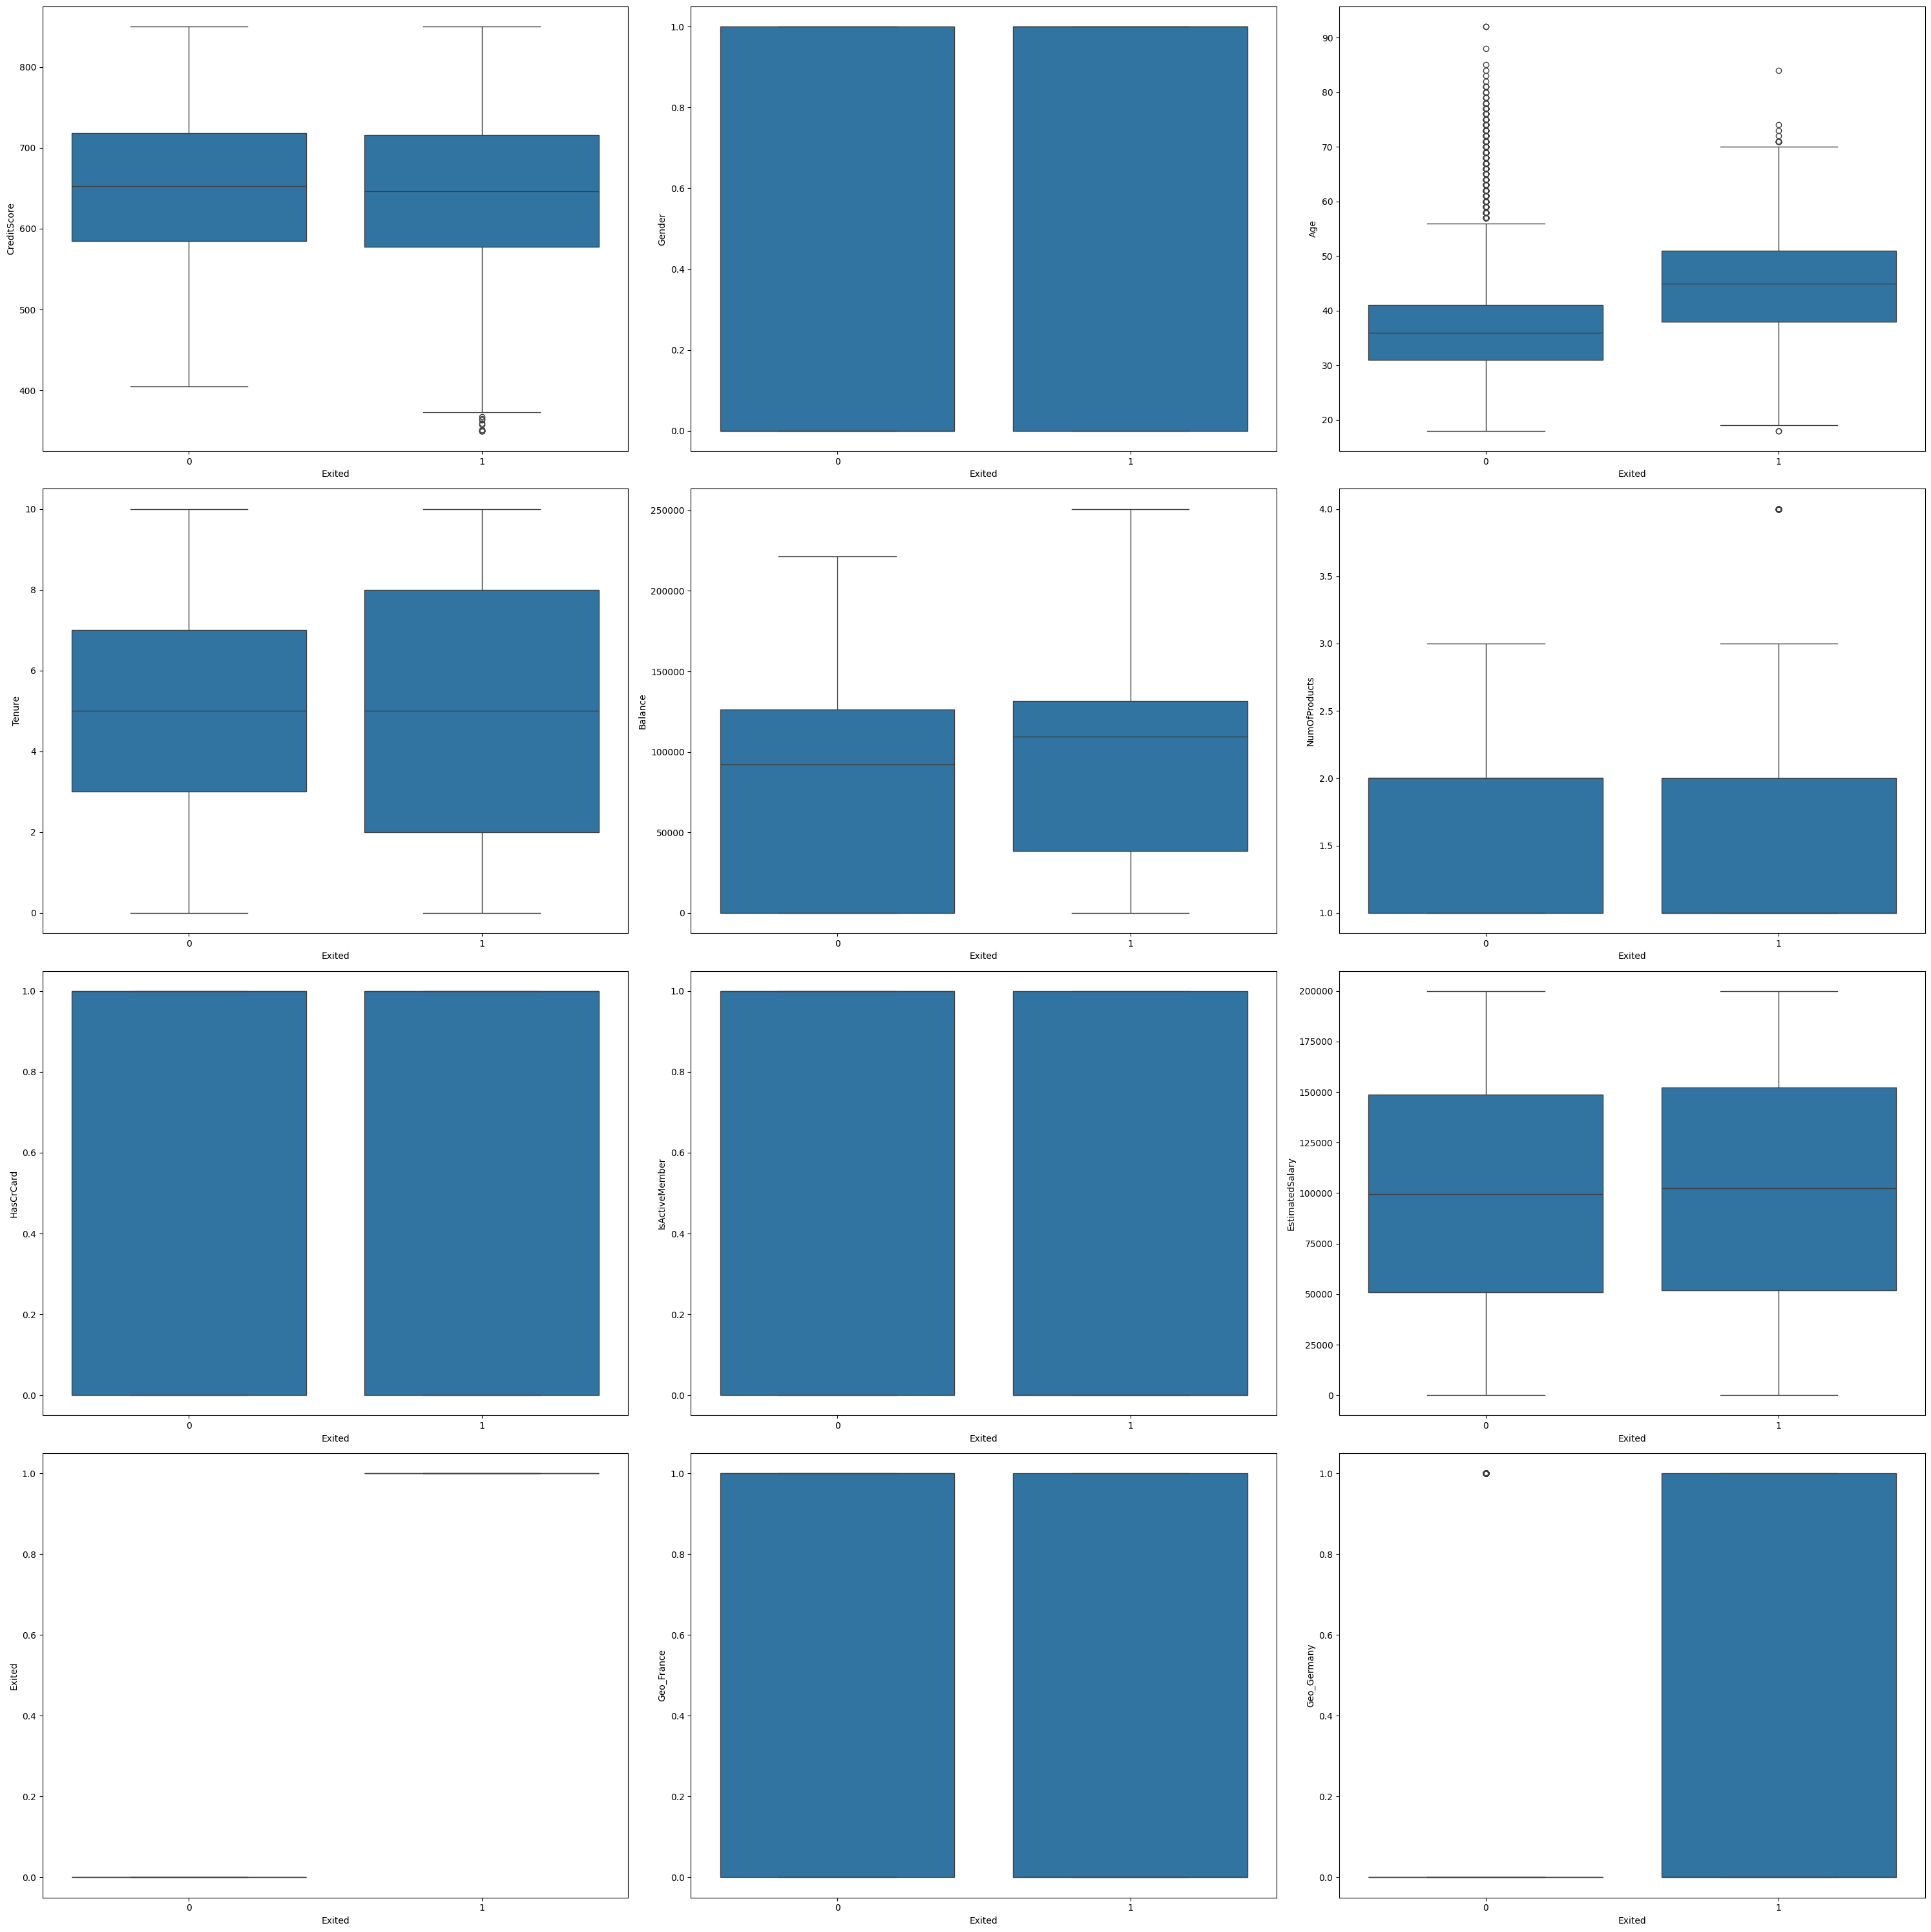

In [16]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize= (30,30))
row =0
col = 0
for i in range(len(df.columns) -1):
  if col > 2:
    row += 1
    col = 0
  axes = ax[row,col]
  sns.boxplot(x = df['Exited'], y = df[df.columns[i]],ax = axes)
  col += 1
plt.tight_layout()
plt.show()

In [17]:
y = df.Exited
X =df.drop(['Exited'], axis=1)

In [18]:
X.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
6,645,0,44,8,113755.78,2,1,0,149756.71,0,0,1
7,822,0,50,7,0.00,2,1,1,10062.80,1,0,0
8,376,1,29,4,115046.74,4,1,0,119346.88,0,1,0
9,501,0,44,4,142051.07,2,0,1,74940.50,1,0,0


## SPLITTING THE DATA INTO TRAIN & TEST

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 0)


## Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Sequential model to initialize our ANN & dense module to build the layers
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 100,
                kernel_initializer = 'uniform',
                activation = 'relu',
                input_dim = 12))

# Adding the second hidden layer
model.add(Dense(units = 150,
                kernel_initializer = 'uniform',
                activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 200,
                kernel_initializer = 'uniform',
                activation = 'relu'))

# Adding the fourth  hidden layer
model.add(Dense(units = 200,
                kernel_initializer = 'uniform',
                activation = 'relu'))

# Adding the fifth hidden layer
model.add(Dense(units = 100,
                kernel_initializer = 'uniform',
                activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1,
                kernel_initializer = 'uniform',
                activation = 'sigmoid'))





In [23]:
# COmpile the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1300      
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 200)               30200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 107051 (418.17 KB)
Trainable params: 10705

In [25]:
# Fitting the ANN to the training set
EPOCHS = 100
BATCH_SIZE = 64

# TRAIN MODEL
H = model.fit(X_train,
              y_train,
              batch_size = BATCH_SIZE,
              epochs = EPOCHS,
              validation_split = 0.2,
              verbose = 1)


Epoch 1/100
84/84 [==============================] - 4s 14ms/step - loss: 0.4934 - accuracy: 0.7974 - val_loss: 0.4248 - val_accuracy: 0.8000
Epoch 2/100
84/84 [==============================] - 1s 9ms/step - loss: 0.4149 - accuracy: 0.8166 - val_loss: 0.3912 - val_accuracy: 0.8373
Epoch 3/100
84/84 [==============================] - 1s 10ms/step - loss: 0.3719 - accuracy: 0.8511 - val_loss: 0.3579 - val_accuracy: 0.8590
Epoch 4/100
84/84 [==============================] - 1s 11ms/step - loss: 0.3536 - accuracy: 0.8547 - val_loss: 0.3552 - val_accuracy: 0.8567
Epoch 5/100
84/84 [==============================] - 1s 13ms/step - loss: 0.3446 - accuracy: 0.8610 - val_loss: 0.3577 - val_accuracy: 0.8664
Epoch 6/100
84/84 [==============================] - 2s 19ms/step - loss: 0.3396 - accuracy: 0.8621 - val_loss: 0.3456 - val_accuracy: 0.8619
Epoch 7/100
84/84 [==============================] - 1s 16ms/step - loss: 0.3380 - accuracy: 0.8625 - val_loss: 0.3393 - val_accuracy: 0.8672
Epoch 8

In [26]:
H.history

{'loss': [0.49344727396965027,
  0.41494569182395935,
  0.37188562750816345,
  0.35357430577278137,
  0.34456494450569153,
  0.3395627439022064,
  0.33804255723953247,
  0.33345046639442444,
  0.33055323362350464,
  0.33208945393562317,
  0.3262948989868164,
  0.3240952789783478,
  0.31983307003974915,
  0.3154318332672119,
  0.31256529688835144,
  0.31335946917533875,
  0.3075847029685974,
  0.2994414269924164,
  0.3001144826412201,
  0.2893620431423187,
  0.2919282019138336,
  0.28882208466529846,
  0.28314951062202454,
  0.281370609998703,
  0.26721206307411194,
  0.2753625810146332,
  0.2645397484302521,
  0.255401074886322,
  0.24780811369419098,
  0.2518019378185272,
  0.24061475694179535,
  0.2402513474225998,
  0.2287859320640564,
  0.21686199307441711,
  0.21744805574417114,
  0.20604917407035828,
  0.2088724672794342,
  0.20884421467781067,
  0.19075261056423187,
  0.19609221816062927,
  0.19360925257205963,
  0.17720980942249298,
  0.17583465576171875,
  0.20202882587909698,

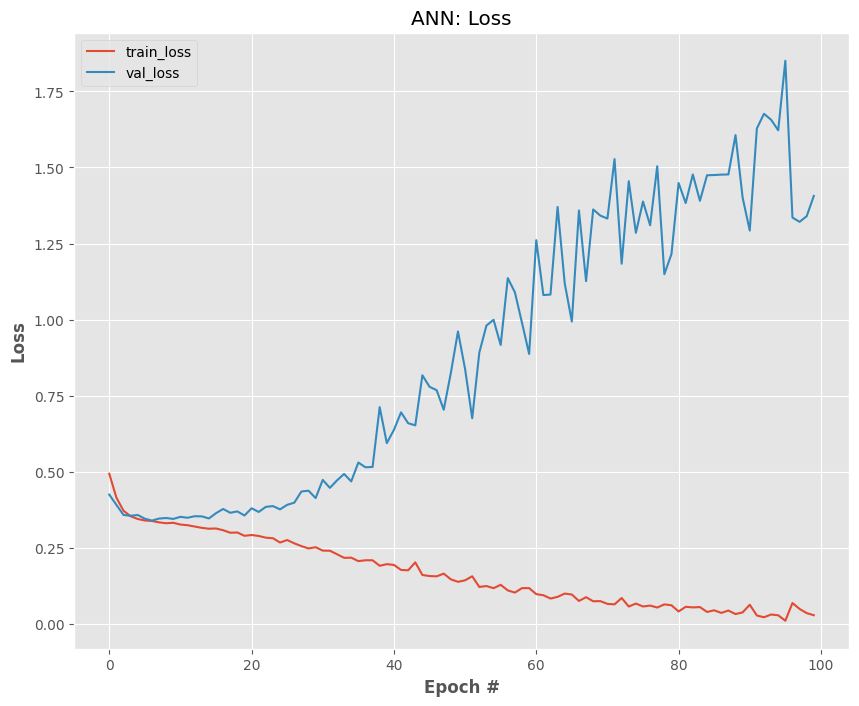

In [28]:
# Plot the training & validation loss
N = np.arange(0,EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label = "train_loss")
plt.plot(N, H.history["val_loss"], label ="val_loss")
plt.title("ANN: Loss")
plt.xlabel("Epoch #", weight ="bold")
plt.ylabel("Loss", weight = "bold")
plt.legend()
plt.show()

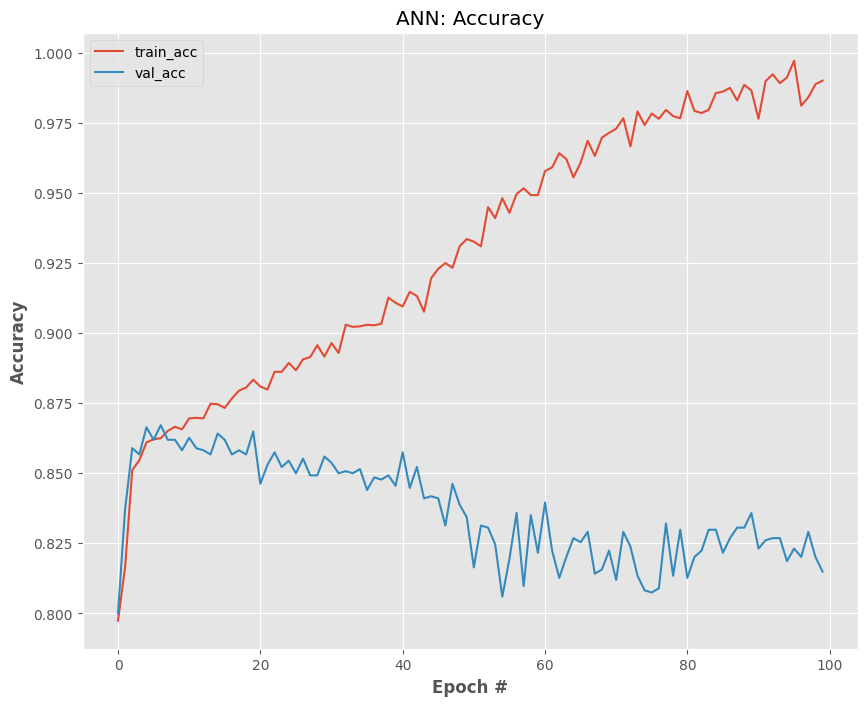

In [29]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("ANN: Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [30]:
score, acc = model.evaluate(X_train, y_train, batch_size =10)
print('Train score:', score)
print('Train accuracy:', acc)


670/670 [==============================] - 2s 4ms/step - loss: 0.3052 - accuracy: 0.9549
Train score: 0.3051811456680298
Train accuracy: 0.9549253582954407


## PART 3 - MAKING PREDICTION & EVALUATING THE MODEL

In [31]:
# PREDICTING THE TEST RESULTS
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print('*'*20)
score, acc= model.evaluate(X_test, y_test, batch_size =10)
print('Test score:', score)
print('Test accuracy:', acc)

104/104 [==============================] - 1s 4ms/step
********************
330/330 [==============================] - 1s 3ms/step - loss: 1.4504 - accuracy: 0.7997
Test score: 1.4504457712173462
Test accuracy: 0.7996969819068909


## MAKING CONFUSION MATRIX

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

## EVALUATION MATRIX

Text(0.5, 23.52222222222222, 'Predicted label')

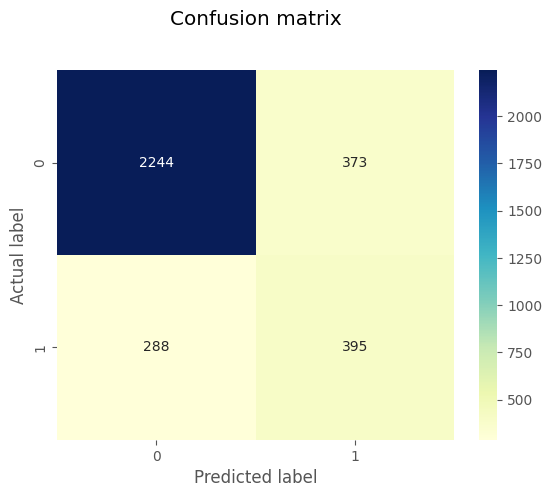

In [33]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt ='g')
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
# Import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      2617
           1       0.51      0.58      0.54       683

    accuracy                           0.80      3300
   macro avg       0.70      0.72      0.71      3300
weighted avg       0.81      0.80      0.80      3300



104/104 [==============================] - 2s 14ms/step


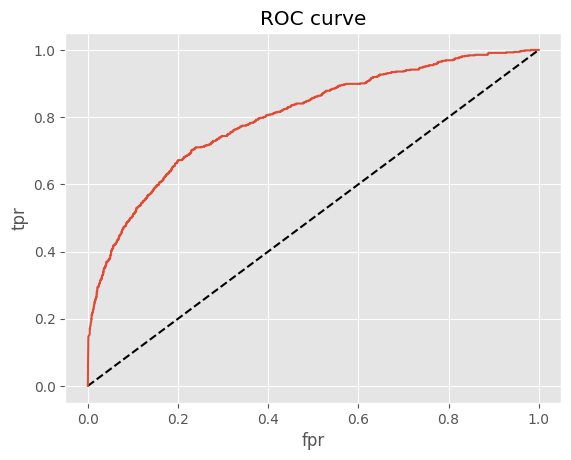

In [36]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [38]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8009394593632916